# DS 3000 HW 5 

Due: Sunday July 20th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file and the a `PDF` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope. 

**Notice that this is a group assignment. Each group only need to submit one copy and when you submit the work, please include everyone in your group.**

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Project proposal

For this course, we aim to complete a data analysis project about the the game [Palworld](https://en.wikipedia.org/wiki/Palworld). To help you start with the project, here are a couple of things you need to consider and work on to get a clean data for later analysis. 

To start with the project, please take some time to get familiar with the game. You don't need to play it but please at least know the basic terminologies, like what is a Pal. (And also, if you do play it, please do not spend too much time on it.)

The two recommended database is [https://palworld.gg/](https://palworld.gg/) and [https://paldb.cc/en/](https://paldb.cc/en/). You can use either, or both, or some other database about the Palworld. 

### Part 1.1 (10 points)

Please list 2-3 questions you may be interested to study with the Palworld database. It can be anything related in the game, like the Pals, items or constructions. Some potential question structures can be: 
- Are `A` and `B` related? How they are related?
- Which features may affect `C`'s change?
- If I need a higher `D`, which features may have a lower/higher value?
- Based on `E` and `F`, which items/pals are similar?
- I need to predict the value for `G`, which features I need to consider?

Do tankier pals have weaker attacks?

Based on rarity and price, what items are the most similar?

Do more expensive pals have higher stats?

### Part 1.2 (20 points)

Based on the questions we proposed in the part 1.1, what features we may need to include in the analysis? Check the websites, which website has those information? **You need to pick at least 8 features for analysis.** We recommend a mix of numerical (numbers etc.) and categorical (level etc.) features. Is there any other features that you think it may be important but hard to extract or find on the website (can be something in or not in the game)?

Rarity, Weight, Rank, Price, Defense, Shot Attacks, HP, Melee Attacks, Running Speed and sprinting speed

### Part 1.3 (20 points)

Suppose you do have all the features you mentioned in part 1.2. List 3-4 data visulizations you can make with those features. You do not need to make those visulizations here. Just describe the type of the visualizations (histogram, scatter plot etc. ), which features are involved, will there any hover data or color being added, and **discuss how these data visualizations may be related (or even answer) to your questions in part 1.1**. 

Merge defense and HP, making it X. Also merge shot attack and melee attack, making it Y, visualize their correlation and run linear regression to look for a correlation.

Use KNN classification to find which items are most similar based on rarity and price, taking rarity as x and price as y. Find out which items are most similar. Create a color labeled scatterplot.

We can do a scatterplot that take the price of pals and their stats as x and y

### Part 1.4  (50 points)

Now, go ahead and try to scrape the features you need. 

Please show all the codes you have for web scrapping. Your current output data frame should include at least 4 features. (You do not need to scrape all features at this moment, although it is recommend to start earlier. Also, you can choose to not to use the ones you have scraped in the later analysis. No need to worry if you need to change anything later). **Please design your code in pipeline and clearly document each function.** See the Python Style Guide in Week 1 for proper documentation. It is also recommended to save the data you have scrapped. 

In [1]:
# Get all pals from palworld.gg

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
def get_url_html(url):
    """
    Returns HTML from a url

    Args:
        url (str): a url

    Returns:
        html (str): HTML response from url
    """
    
    html = requests.get(url)
    return html.text

In [3]:
def clean_pal_data(html):
    """
    Scrapes pals from palworld.gg and creates a dataframe with names, HP, defense, melee attack, and shot attack statistics

    Args:
        html (str): html text object from palworld.gg

    Returns:
        clean_df (DataFrame): DataFrame with columns
                                Name (str): name of the pal
                                HP (int): health points of the pal
                                Defense (int): defense statistics of the pal
                                Melee Attack (int): melee attack statistics of the pal
                                Shot Attack (int): shot attack statistics of the pal
    """
    # create soup object with the html text object
    soup = BeautifulSoup(html, 'html.parser')

    # find all divs that have a class name of 'pal'
    all_pals = soup.find_all('div', class_='pal')

    # initialize feature lists
    pal_names = []
    pal_HP = []
    pal_defense = []
    pal_melee_attack = []
    pal_shot_attack = []
    pal_price = []
    pal_rarity = []

    # iterate through each pal to get name and href
    for pal in all_pals:
        if pal.find('a'):
            href = pal.find('a')['href']    
            
        # build pal url
        pal_url = 'https://palworld.gg' + href
        
        # get html from the pal url
        pal_html = get_url_html(pal_url)

        # create soup object with the html text object from the pal url
        pal_soup = BeautifulSoup(pal_html)

        # find pal statistics by finding div with class name of 'stats'
        stats_section = pal_soup.find('div', class_='stats')
        all_stat_items = stats_section.find_all('div', class_='item')
        
        pal_names.append(href.split('/')[-1])
        
        rarity = pal_soup.find('div', class_ = 'below')
        rarity_text = rarity.find('div', class_ = 'name').text
        
        # get all stats
        stat_map = {
            'HP': pal_HP,
            'Defense': pal_defense,
            'Melee Attack': pal_melee_attack,
            'Shot Attack': pal_shot_attack,
            'Price': pal_price,
        }

        for stat in all_stat_items:
            for key, stat_list in stat_map.items():
                if key in stat.text:
                    value = stat.find('div', class_='value').text
                    stat_list.append(value)
                    break  # stop after the first match
        pal_rarity.append(rarity_text)


    # create DataFrame
    all_pal_data = pd.DataFrame({
        'Name': pal_names,
        'HP': pal_HP,
        'Defense': pal_defense,
        'Melee Attack': pal_melee_attack,
        'Shot Attack': pal_shot_attack,
        'Price': pal_price,
        'Rarity': pal_rarity
    })
    return all_pal_data

In [4]:
html = get_url_html('https://palworld.gg/pals')

df = clean_pal_data(html)

In [5]:
df.to_csv('thing.csv')

In [6]:
import sklearn.preprocessing as StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
df['Rarity'].unique

<bound method Series.unique of 0        Epic
1      Common
2        Epic
3        Rare
4        Rare
        ...  
221      Epic
222      Epic
223      Epic
224      Rare
225    Common
Name: Rarity, Length: 226, dtype: object>

Classification Report:
              precision    recall  f1-score   support

      Common       0.79      0.83      0.81       101
        Epic       0.60      0.59      0.60        44
   Legendary       0.83      0.62      0.71         8
        Rare       0.57      0.55      0.56        73

    accuracy                           0.69       226
   macro avg       0.70      0.65      0.67       226
weighted avg       0.68      0.69      0.68       226



/opt/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


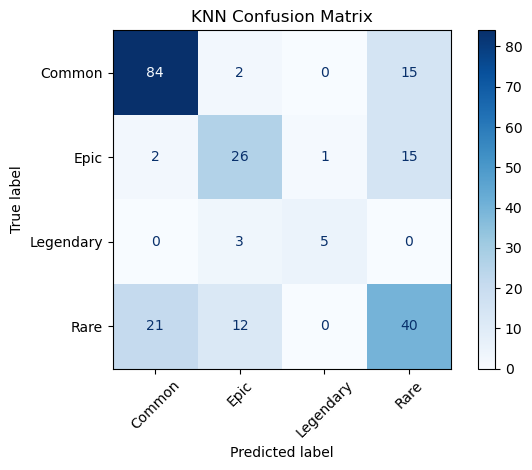

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Feature columns and target
x_feature_list = ['HP', 'Defense', 'Melee Attack', 'Shot Attack', 'Price']
x = df[x_feature_list].values
y = df['Rarity'].values  # keep string labels

# Normalize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Stratified K-Fold setup
n_splits = 10
skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Model
knn = KNeighborsClassifier(n_neighbors=5)

# Prepare empty predictions array
y_pred = np.empty_like(y, dtype=object)

# Cross-validation loop
for train_idx, test_idx in skfold.split(x_scaled, y):
    x_train, x_test = x_scaled[train_idx], x_scaled[test_idx]
    y_train = y[train_idx]

    knn.fit(x_train, y_train)
    y_pred[test_idx] = knn.predict(x_test)

# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()


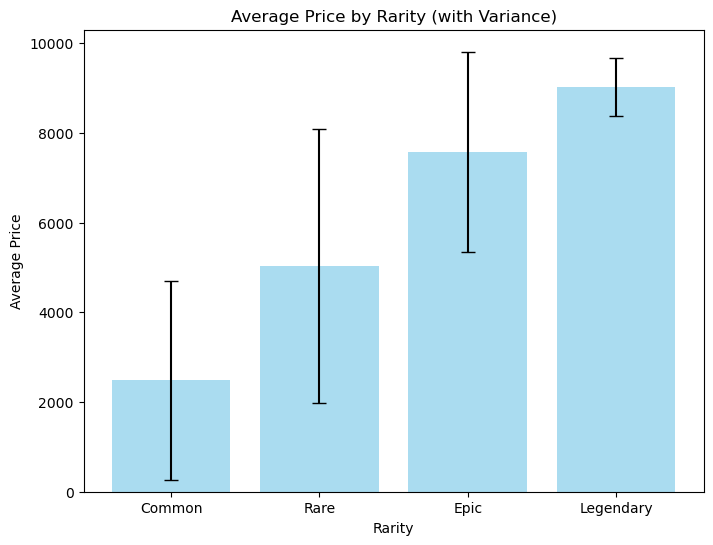

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure Price is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Group by Rarity
group_stats = df.groupby('Rarity')['Price'].agg(['mean', 'std']).reset_index()

# Sort by rarity in desired order
rarity_order = ['Common', 'Rare', 'Epic', 'Legendary']
group_stats['Rarity'] = pd.Categorical(group_stats['Rarity'], categories=rarity_order, ordered=True)
group_stats = group_stats.sort_values('Rarity')

# Data for plotting
x = np.arange(len(group_stats))
means = group_stats['mean']
stds = group_stats['std']

plt.figure(figsize=(8, 6))
plt.bar(x, means, yerr=stds, capsize=5, alpha=0.7, color='skyblue')

plt.xticks(x, group_stats['Rarity'])
plt.title('Average Price by Rarity (with Variance)')
plt.xlabel('Rarity')
plt.ylabel('Average Price')

plt.show()


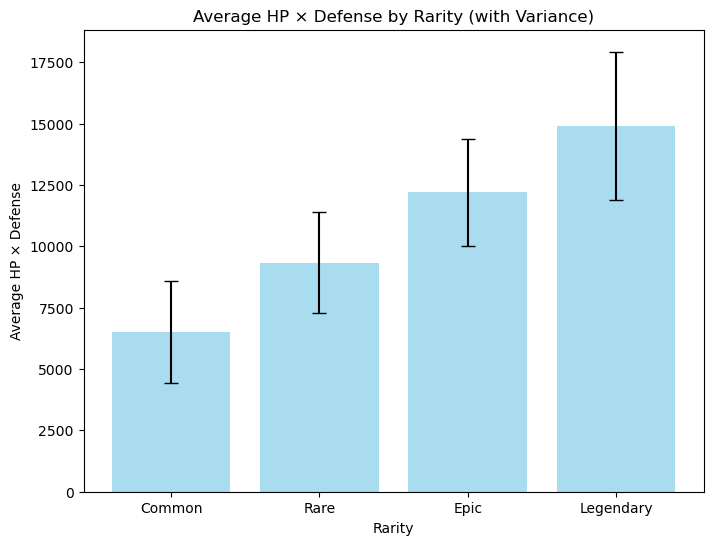

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make sure HP and Defense are numeric
df['HP'] = pd.to_numeric(df['HP'], errors='coerce')
df['Defense'] = pd.to_numeric(df['Defense'], errors='coerce')

# Create new column: HP * Defense
df['HP_Defense'] = df['HP'] * df['Defense']

# Group by Rarity
group_stats = df.groupby('Rarity')['HP_Defense'].agg(['mean', 'std']).reset_index()

# Sort by rarity order
rarity_order = ['Common', 'Rare', 'Epic', 'Legendary']
group_stats['Rarity'] = pd.Categorical(group_stats['Rarity'], categories=rarity_order, ordered=True)
group_stats = group_stats.sort_values('Rarity')

# Data for plotting
x = np.arange(len(group_stats))
means = group_stats['mean']
stds = group_stats['std']

# Bar chart with variance
plt.figure(figsize=(8, 6))
plt.bar(x, means, yerr=stds, capsize=5, alpha=0.7, color='skyblue')

plt.xticks(x, group_stats['Rarity'])
plt.title('Average HP × Defense by Rarity (with Variance)')
plt.xlabel('Rarity')
plt.ylabel('Average HP × Defense')

plt.show()
